<a href="https://colab.research.google.com/github/MAOK-Yongsuk/One-Project-per-week-Challenge/blob/main/Week03/ImageDenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()
print(X_train.shape)

X_train = X_train/255.0
X_test = X_test/255.0

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)


In [16]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
print(X_train_noisy.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

X_train_noisy.shape

(60000, 28, 28, 1)


(60000, 28, 28, 1)

In [32]:
def deDims(img):
  if img.shape[2] == 1:
      img = img[:, :, 0]
  return img

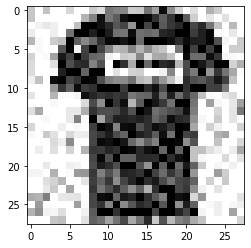

In [17]:
img = X_train_noisy[1]
plt.imshow(deDims(img), cmap=plt.cm.gray_r)
plt.show()

In [18]:
from tensorflow.keras.layers import InputLayer, Conv2D, Conv2DTranspose
from tensorflow.keras import Model, Sequential

class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = Sequential([
        # InputLayer(input_shape=(28,28)),
        Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
        Conv2D(8, (3,3), activation='relu', padding='same', strides=2),
    ])

    self.decoder = Sequential ([
        Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu',padding='same'),
        Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu',padding='same'),
        Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
    ]) 


  def call(self, x):
    encoded = self.encoder(x)  
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()   

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 11s 6ms/step - loss: 0.3391 - val_loss: 0.2890
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2822 - val_loss: 0.2812
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2785 - val_loss: 0.2774
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2759 - val_loss: 0.2771
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2739 - val_loss: 0.2761
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2723 - val_loss: 0.2741
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2711 - val_loss: 0.2719
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2702 - val_loss: 0.2719
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2696 - val_loss: 0.2719
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2691 - val_loss: 0.271

In [19]:
encoded_imgs = autoencoder.encoder(X_test_noisy).numpy()
print(encoded_imgs.shape)
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
print(decoded_imgs.shape)

(10000, 7, 7, 8)
(10000, 28, 28, 1)


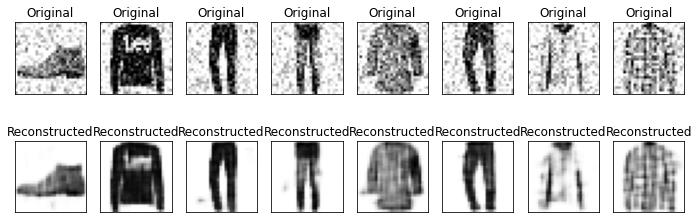

In [33]:
n = 8
plt.figure(figsize=(12,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.title("Original")
  plt.imshow(np.squeeze(X_test_noisy[i]), cmap = plt.cm.gray_r)
  plt.imshow(deDims(X_test_noisy[i]), cmap=plt.cm.gray_r)
  plt.xticks([]); plt.yticks([])

  bx = plt.subplot(2, n, i+n+1)
  plt.title("Reconstructed")
  plt.imshow(np.squeeze(decoded_imgs[i]), cmap = plt.cm.gray_r)
  plt.xticks([]); plt.yticks([])


plt.show()